In [1]:
import numpy as np
import pandas as pd
import os
# import 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/Data-Analytic/football_data.csv")

Mounted at /content/drive


In [3]:
# selecting only integer and float or numberical features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_data = data.select_dtypes(include=numerics)
new_data = new_data.drop(['Unnamed: 0', 'ID','Jersey Number'], axis=1)
# drop unsuable numberical attributes
# new_data.head()
new_data.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [4]:
rows=len(new_data.index)
Value=pd.Series([])
Wage=pd.Series([])
# function to ceonvert wage and value to float
def convert_Wage_Value(i):
  num=''
  for j in range(1,len(i)):
    if (i[j]<='9' and i[j]>='0') or i[j]=='.':
      num+=(i[j])
    if i[j]=='K':
      val=float(num)
      val*=1000  
      return val
    if i[j]=='M':
      val=float(num)
      val*=1e6  
      return val 

  return float(num)  

for i in range(len(data['Value'])):
  Value[i]=convert_Wage_Value(data['Value'][i])
  Wage[i]=convert_Wage_Value(data['Wage'][i])
# inserting value and wage into dataframe after converting into numberical attributes
new_data.insert(2,'Value',Value,True)
new_data.insert(2,'Wage',Wage,True)

new_data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Overall,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,9731.312133,2.410696e+06,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,21999.290406,5.594933e+06,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,0.000000,0.000000e+00,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,1000.000000,3.000000e+05,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,3000.000000,6.750000e+05,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,9000.000000,2.000000e+06,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,565000.000000,1.185000e+08,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.00

In [5]:
import re
# converting height in numberical and inserting into dataframe
def HeightConvert(cell):
  cell=str(cell)
  if cell[len((cell))-2]=="'":
    cell=re.sub("[']",".0",(cell))
  else:
    cell=re.sub("[']",".",(cell))
  return float(cell)
  
Height=pd.Series([])
for i in range(rows):
  Height[i]=HeightConvert(data['Height'][i])
new_data.insert(2,'Height',Height,True)  
# new_data.describe()

new_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


,Age,Overall,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,5.07,565000.0,110500000.0,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,6.02,405000.0,77000000.0,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,5.09,290000.0,118500000.0,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,6.04,260000.0,72000000.0,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,5.11,355000.0,102000000.0,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [6]:
Weight=pd.Series([])
for (coln,cold) in data.iteritems():
  if coln=="Weight":
    Weight = data[coln].apply(lambda weight : float(weight[:-3]) if type(weight) is str else float(weight))
# converting weight in numberical

# new_data.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [7]:
# print(Weight)
new_data.insert(2,'Weight',Weight,True)
PositionsList = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for (coln, cold) in data.iteritems():
  if coln in PositionsList:
    data[coln] = data[coln].apply(lambda position : int(position[:-2]) +  (int(position[3:4])//2) if type(position) is str else float(position))
    new_data.insert(2,coln,data[coln],True)

# converting all the attributes from list PositonsList in numberical and inserting into dataframe

new_data.describe()


,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,18159.000000,18159.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,57.80691,56.614750,56.614750,56.614750,57.80691,58.513398,57.825270,57.825270,57.825270,58.513398,60.734834,59.221002,59.221002,59.221002,60.734834,59.983253,59.983253,59.983253,60.037774,59.719514,59.719514,59.719514,60.037774,58.815594,58.815594,58.815594,165.979129,5.545641,9731.312133,2.410696e+06,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,9.51627,11.702684,11.702684,11.702684,9.51627,8.956184,10.068153,10.068153,10.068153,8.956184,9.231938,8.780952,8.780952,8.780952,9.231938,9.749195,9.749195,9.749195,9.860040,9.820331,9.820331,9.820331,9.860040,9.108812,9.108812,9.108812,15.593344,0.461820,21999.290406,5.594933e+06,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,30.00000,26.000000,26.000000,26.000000,30.00000,31.000000,29.000000,29.000000,29.000000,31.000000,28.000000,31.000000,31.000000,31.000000,28.000000,28.000000,28.000000,28.000000,26.000000,28.000000,28.000000,28.000000,26.000000,32.000000,32.000000,32.000000,110.000000,5.010000,0.000000,0.000000e+00,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,51.00000,47.000000,47.000000,47.000000,51.00000,52.000000,50.000000,50.000000,50.000000,52.000000,55.000000,53.000000,53.000000,53.000000,55.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,53.000000,53.000000,53.000000,154.000000,5.090000,1000.000000,3.000000e+05,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000

In [8]:

new_data=new_data.dropna()
# droping rows and columns which contain Nan values
new_data.reset_index(drop = True)
print(new_data)
new_data.describe()

       Age  Overall    RB  ...  GKKicking  GKPositioning  GKReflexes
0       31       94  60.0  ...       15.0           14.0         8.0
1       33       94  62.0  ...       15.0           14.0        11.0
2       26       92  61.0  ...       15.0           15.0        11.0
4       27       91  74.0  ...        5.0           10.0        13.0
5       27       91  61.0  ...        6.0            8.0         8.0
...    ...      ...   ...  ...        ...            ...         ...
18202   19       47  46.0  ...        7.0            8.0         9.0
18203   19       47  30.0  ...        9.0            5.0        12.0
18204   16       47  34.0  ...       10.0            6.0        13.0
18205   17       47  36.0  ...       14.0            8.0         9.0
18206   16       46  47.0  ...        9.0           12.0         9.0

[16122 rows x 71 columns]


,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,16122.000000,16122.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,1.612200e+04,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,25.005272,66.461233,57.80691,56.614750,56.614750,56.614750,57.80691,58.513398,57.825270,57.825270,57.825270,58.513398,60.734834,59.221002,59.221002,59.221002,60.734834,59.983253,59.983253,59.983253,60.037774,59.719514,59.719514,59.719514,60.037774,58.815594,58.815594,58.815594,164.133854,5.494243,10130.194765,2.522221e+06,71.515631,1667.311066,1.115494,3.004590,2.532502,54.195013,49.762250,57.065190,62.642724,46.745069,60.590125,51.254497,46.433445,56.101786,63.201216,67.915333,67.993735,66.427863,62.204999,66.585163,59.601600,66.019601,67.336373,65.910929,51.441508,59.581938,50.426994,54.823533,55.468986,52.131001,60.350391,51.313050,51.917256,49.634723,10.499070,10.556445,10.550118,10.529215,10.508436
std,4.547106,6.794631,9.51627,11.702684,11.702684,11.702684,9.51627,8.956184,10.068153,10.068153,10.068153,8.956184,9.231938,8.780952,8.780952,8.780952,9.231938,9.749195,9.749195,9.749195,9.860040,9.820331,9.820331,9.820331,9.860040,9.108812,9.108812,9.108812,14.807415,0.457179,22582.379873,5.711658e+06,6.074413,196.456304,0.396542,0.636915,0.617823,14.128841,16.377475,11.605909,9.785086,14.781959,12.511927,15.145165,15.070673,12.388396,10.013325,11.744513,11.464128,12.343648,8.767710,12.168537,13.228839,11.532420,11.181344,12.597878,15.729601,14.446229,18.798222,14.675196,12.912500,12.510791,10.148784,17.217843,19.171370,19.169624,3.095231,3.073416,3.140666,3.079219,3.100045
min,16.000000,46.000000,30.00000,26.000000,26.000000,26.000000,30.00000,31.000000,29.000000,29.000000,29.000000,31.000000,28.000000,31.000000,31.000000,31.000000,28.000000,28.000000,28.000000,28.000000,26.000000,28.000000,28.000000,28.000000,26.000000,32.000000,32.000000,32.000000,110.000000,5.010000,0.000000,0.000000e+00,48.000000,1000.000000,1.000000,1.000000,2.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,25.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,51.00000,47.000000,47.000000,47.000000,51.00000,52.000000,50.000000,50.000000,50.000000,52.000000,55.000000,53.000000,53.000000,53.000000,55.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,53.000000,53.000000,53.000000,154.000000,5.090000,1000.000000,3.500000e+05,67.000000,1526.000000,1.000000,3.000000,2.000000,44.000000,36.000000,49.000000,57.0

In [9]:
# new_data=pca.transform(new_data)
new_data


,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,60.0,48.0,48.0,48.0,60.0,65.0,62.0,62.0,62.0,65.0,92.0,85.0,85.0,85.0,92.0,94.0,94.0,94.0,93.0,94.0,94.0,94.0,93.0,89.0,89.0,89.0,159.0,5.07,565000.0,110500000.0,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,62.0,54.0,54.0,54.0,62.0,66.0,62.0,62.0,62.0,66.0,89.0,82.0,82.0,82.0,89.0,89.0,89.0,89.0,90.0,91.0,91.0,91.0,90.0,92.0,92.0,92.0,183.0,6.02,405000.0,77000000.0,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,61.0,48.0,48.0,48.0,61.0,66.0,61.0,61.0,61.0,66.0,89.0,82.0,82.0,82.0,89.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,85.0,85.0,85.0,150.0,5.09,290000.0,118500000.0,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,91,74.0,67.0,67.0,67.0,74.0,78.0,78.0,78.0,78.0,78.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,88.0,88.0,88.0,88.0,88.0,83.0,83.0,83.0,154.0,5.11,355000.0,102000000.0,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,91,61.0,50.0,50.0,50.0,61.0,67.0,64.0,64.0,64.0,67.0,90.0,83.0,83.0,83.0,90.0,90.0,90.0,90.0,90.0,89.0,89.0,89.0,90.0,84.0,84.0,84.0,163.0,5.08,340000.0,93000000.0,91,2142,4.0,4.0,4.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,46.0,46.0,46.0,46.0,46.0,45.0,46.0,46.0,46.0,45.0,45.0,46.0,46.0,46.0,45.0,46.0,46.0,46.0,45.0,45.0,45.0,45.0,45.0,43.0,43.0,43.0,134.0,5.09,1000.0,60000.0,65,1307,1.0,2.0,2.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,47,30.0,33.0,33.0,33.0,30.0,31.0,32.0,32.0,32.0,31.0,39.0,36.0,36.0,36.0,39.0,41.0,41.0,41.0,40.0,43.0,43.0,43.0,40.0,46.0,46.0,46.0,170.0,6.03,1000.0,60000.0,63,1098,1.0,2.0,2.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,47,34.0,29.0,29.0,29.0,34.0,35.0,31.0,31.0,31.0,35.0,45.0,39.0,39.0,39.0,45.0,45.0,45.0,45.0,46.0,47.0,47.0,47.0,46.0,46.0,46.0,46.0,148.0,5.08,1000.0,60000.0,67,1189,1.0,3.0,2.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,47,36.0,32.0,32.0,32.0,36.0,37.0,33.0,33.0,33.0,37.0,47.0,40.0,40.0,40.0,47.0,46.0,46.0,46.0,48.0,47.0,47.0,47.0,48.0,48.0,48.0,48.0,154.0,5.10,1000.0,60000.0,66,1228,1.0,3.0,2.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.

In [10]:
# from sklearn.preprocessing import StandardScaler, normalize 
# from sklearn.metrics import silhouette_score 

# scaler=StandardScaler()

# datasetscaled=scaler.fit_transform(new_data)

# normalized=normalize(datasetscaled)

# normalize_data=pd.DataFrame(normalized,columns=new_data.columns)

# normalize_data.describe()
normalize_data=(new_data-new_data.min())/(new_data.max()-new_data.min())

# Normalizing the data


In [ ]:
normalize_data

,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0.60,1.000000,0.545455,0.354839,0.354839,0.354839,0.545455,0.618182,0.559322,0.559322,0.559322,0.618182,1.000000,0.931034,0.931034,0.931034,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.950000,0.950000,0.950000,0.368421,0.056075,1.000000,0.932489,0.978723,0.893016,1.00,0.75,0.666667,0.890244,1.000000,0.696203,0.958904,0.9500,1.000000,0.987952,1.000000,0.918919,1.000000,0.922078,0.859155,0.931507,0.986667,0.986486,0.876543,0.597015,0.652174,0.472222,1.000000,0.426829,0.146341,0.988095,1.000000,0.7875,1.000000,0.273810,0.216867,0.197531,0.138889,0.31250,0.350,0.40625,0.194444
1,0.68,1.000000,0.581818,0.451613,0.451613,0.451613,0.581818,0.636364,0.559322,0.559322,0.559322,0.636364,0.953125,0.879310,0.879310,0.879310,0.953125,0.924242,0.924242,0.924242,0.955224,0.954545,0.954545,0.954545,0.955224,1.000000,1.000000,1.000000,0.548872,0.943925,0.716814,0.649789,0.978723,0.912333,1.00,0.75,1.000000,0.890244,0.988235,0.936709,0.835616,0.9625,0.891566,0.843373,0.785714,0.783784,0.971831,0.896104,0.929577,0.876712,1.000000,0.648649,1.000000,1.000000,0.884058,0.750000,0.987952,0.609756,0.231707,1.000000,0.853659,0.9125,0.986486,0.214286,0.253012,0.160494,0.166667,0.31250,0.350,0.40625,0.277778
2,0.40,0.958333,0.563636,0.354839,0.354839,0.354839,0.563636,0.636364,0.542373,0.542373,0.542373,0.636364,0.953125,0.879310,0.879310,0.879310,0.953125,0.939394,0.939394,0.939394,0.955224,0.939394,0.939394,0.939394,0.955224,0.883333,0.883333,0.883333,0.300752,0.074766,0.513274,1.000000,0.957447,0.849183,1.00,1.00,1.000000,0.829268,0.905882,0.594937,0.876712,0.9250,0.987952,0.927711,0.916667,0.797297,0.985915,0.961039,0.915493,1.000000,0.973333,0.837838,0.814815,0.492537,0.782609,0.333333,0.855422,0.524390,0.317073,0.928571,0.914634,0.8625,0.972973,0.202381,0.168675,0.283951,0.222222,0.25000,0.350,0.43750,0.277778
4,0.44,0.937500,0.800000,0.661290,0.661290,0.661290,0.800000,0.854545,0.830508,0.830508,0.830508,0.854545,0.953125,0.982759,0.982759,0.982759,0.953125,0.924242,0.924242,0.924242,0.925373,0.909091,0.909091,0.909091,0.925373,0.850000,0.850000,0.850000,0.330827,0.093458,0.628319,0.860759,0.936170,0.951709,0.75,1.00,0.666667,1.000000,0.847059,0.506329,0.986301,0.9000,0.867470,0.891566,0.869048,0.972973,0.929577,0.753247,0.718310,0.767123,0.933333,0.743243,0.950617,0.522388,0.913043,0.694444,0.963855,0.768293,0.621951,0.904762,1.000000,0.8375,0.891892,0.690476,0.578313,0.506173,0.388889,0.37500,0.100,0.28125,0.333333
5,0.44,0.937500,0.563636,0.387097,0.387097,0.387097,0.563636,0.654545,0.593220,0.593220,0.593220,0.654545,0.968750,0.896552,0.896552,0.896552,0.968750,0.939394,0.939394,0.939394,0.955224,0.924242,0.924242,0.924242,0.955224,0.866667,0.866667,0.866667,0.398496,0.065421,0.601770,0.784810,0.914894,0.848440,0.75,0.75,0.666667,0.853659,0.870588,0.582278,0.945205,0.8750,0.975904,0.867470,0.821429,0.864865,0.971831,0.961039,0.887324,0.986301,0.920000,0.972973,0.839506,0.417910,0.811594,0.569444,0.831325,0.500000,0.378049,0.904762,0.939024,0.9250,0.932432,0.285714,0.204819,0.148148,0.277778,0.34375,0.125,0.21875,0.194444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,0.12,0.020833,0.290909,0.322581,0.322581,0.322581,0.29

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(normalize_data)
pca_data=pca.transform(normalize_data)
pca_data=pd.DataFrame(pca_data)
pca_data.columns=['PCA1','PCA2']

# for visualizing data in 2D reduce the dimesion of feature vectors




In [12]:
# print(normalized_data[0])
print(new_data)
print(normalize_data)

       Age  Overall    RB  ...  GKKicking  GKPositioning  GKReflexes
0       31       94  60.0  ...       15.0           14.0         8.0
1       33       94  62.0  ...       15.0           14.0        11.0
2       26       92  61.0  ...       15.0           15.0        11.0
4       27       91  74.0  ...        5.0           10.0        13.0
5       27       91  61.0  ...        6.0            8.0         8.0
...    ...      ...   ...  ...        ...            ...         ...
18202   19       47  46.0  ...        7.0            8.0         9.0
18203   19       47  30.0  ...        9.0            5.0        12.0
18204   16       47  34.0  ...       10.0            6.0        13.0
18205   17       47  36.0  ...       14.0            8.0         9.0
18206   16       46  47.0  ...        9.0           12.0         9.0

[16122 rows x 71 columns]
        Age   Overall        RB  ...  GKKicking  GKPositioning  GKReflexes
0      0.60  1.000000  0.545455  ...      0.350        0.40625    0.19

In [13]:
# normalized_data.fillna(normalized_data.mean())


import random

# columns=len(normalized_data[0])

def KMeanIntialize(K,data,rows,columns):
  Centroids=[]
  rand=random.randint(0,rows)
  # define intial k-cluster using k-mean++ algorithm
  Centroids.append(rand)
  while len(Centroids)<K:
    distance=np.zeros(rows)
    for i in range(rows):
      input=data[i]
      store=np.zeros(len(Centroids))
      for j in range(len(Centroids)):
        output=data[Centroids[j]]
        dist=0.0
        for k in range(columns):
          dist+=(input[k]-output[k])*(input[k]-output[k])
        store[j]+=dist  
      distance[i]+=(np.min(store))
    index=np.argmax(distance)
    Centroids.append(np.argmax(distance,axis=0))  
  # print(Centroids)
  Center=[]
  for i in range(K):
    Center.append(np.array(data[Centroids[i]]))

  return Center
 
        



In [14]:
# Cluster=[[],[],[]]


def KMean(K, data,Center,rows,columns):
  Cluster=[]
  labels=np.zeros(rows)

  for i in range(K):
    Cluster.append([])
  for itr in range(50):
    for i in range(rows):
      input=data[i]
      dis=np.zeros(K)
      for j in range(K):
        sum=0.0
        for k in range(columns):
          sum+=(input[k]-Center[j][k])**2
        dis[j]+=sum
      Cluster[np.argmin(dis,axis=0)].append(input)
      labels[i]=np.argmin(dis,axis=0)
    Cluster=np.array(Cluster)
    Center.clear()
    for i in range(K):
      Center.append(np.mean(Cluster[i],axis=0))
    # print(len(Cluster[0]))
    Cluster=list(Cluster)
    Cluster=[]
    for i in range(K):
      Cluster.append([])
  return labels,Cluster_Quality(K,Center,data,labels,rows,columns),Center
# calculating within cluster square of sum for elbow method
def Cluster_Quality(K,Center,data,labels,rows,columns):
  sum=0

  for i in range(rows):
      k=np.linalg.norm(data[i]-Center[int(labels[i])])
      sum+=(k*k)
  return sum/rows # taking the average
   



  # break;




In [15]:
from sklearn.metrics.pairwise import euclidean_distances

class Similarity:
  def __init__(self,labels,data,cluster_number):
    self.data=data
    self.label=labels
    self.clusters=cluster_number
    self.metric={}
    # cluster=[]
    # for i in range(self.clusters):
    #   cluster.append([])

    # for i in range(len(self.data)):
    #   cluster[int(self.label[i])].append(data[i])
    
   

  def IntializeMatrix(Self,n,m):
    return np.zeros((n,m),dtype = float)

  def Distances(self):
    cluster=[]
    n=self.clusters
    for i in range(self.clusters):
      cluster.append([])

    for i in range(len(self.data)):
      cluster[int(self.label[i])].append(self.data[i])
    
    for i  in range(self.clusters):
      cluster[i]=np.array(cluster[i])
      print(len(cluster[i]))
    
    Single_Link_Matrix=self.IntializeMatrix(n,n)
    Complete_Link_Matrix=self.IntializeMatrix(n,n)
    Average_Link_Matrix=self.IntializeMatrix(n,n)
    Mean_Link_Matrix=self.IntializeMatrix(n,n)

    for i in range(self.clusters):
      for j in range(i,self.clusters):
        dist=euclidean_distances(cluster[i],cluster[j])
        # print(dist)
        # break
        min=np.amin(dist)
        max=np.amax(dist)
        average=np.mean(dist)
        # print(i,j)
        # print(min,max,average)
        # print(np.mean(cluster[i],axis=0))


        mean=np.linalg.norm(np.mean(cluster[i],axis=0)-np.mean(cluster[j],axis=0))
        Single_Link_Matrix[i][j] = Single_Link_Matrix[j][i] = min
        Complete_Link_Matrix[i][j]= Complete_Link_Matrix[j][i] = max
        Average_Link_Matrix[i][j] = Average_Link_Matrix[j][i] = average
        Mean_Link_Matrix[i][j] = Mean_Link_Matrix[j][i] = mean
      # break
        # print(Single_Link_Matrix)

    self.metric['single link']=Single_Link_Matrix
    self.metric['complete link']=Complete_Link_Matrix
    self.metric['average link']=Average_Link_Matrix
    self.metric['mean link']=Mean_Link_Matrix

    return self.metric













In [16]:
rows=len(normalize_data)
columns=len(normalize_data.columns)
listofRow=normalize_data.to_numpy().tolist()
center=KMeanIntialize(3,listofRow,rows,columns)
# print(center)
# calling k-mean for k=3

In [17]:
final_labels1,quality1,center1=KMean(3,listofRow,center,rows,columns)
print(quality1,center1)
# similarity=Similarity(final_labels1,listofRow,3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


1.1281445865541482 [array([0.33424437, 0.36248158, 0.53841713, 0.58868375, 0.58868375,
       0.58868375, 0.53841713, 0.49818401, 0.5132262 , 0.5132262 ,
       0.5132262 , 0.49818401, 0.36087281, 0.36749155, 0.36749155,
       0.36749155, 0.36087281, 0.32359568, 0.32359568, 0.32359568,
       0.34421642, 0.31188493, 0.31188493, 0.31188493, 0.34421642,
       0.27941452, 0.27941452, 0.27941452, 0.44697102, 0.64788931,
       0.00808305, 0.00826494, 0.45781026, 0.38158271, 0.00803859,
       0.44533762, 0.00951233, 0.40567406, 0.25118214, 0.56166562,
       0.50128562, 0.27467092, 0.40604298, 0.3154951 , 0.29481272,
       0.42918441, 0.40699017, 0.5264934 , 0.51347312, 0.46102663,
       0.49885316, 0.5023301 , 0.41110416, 0.58515801, 0.54665001,
       0.62718828, 0.28622932, 0.61399841, 0.61770155, 0.33058203,
       0.37770077, 0.36011857, 0.44007724, 0.60626005, 0.64870656,
       0.6397647 , 0.26324692, 0.29568177, 0.23609325, 0.29645423,
       0.26289523]), array([0.42804145, 0.

In [ ]:
similarity=Similarity(final_labels1,listofRow,3)
ans=similarity.Distances()

5359
5787
4976


In [ ]:
print(ans['complete link'])

[[4.08494037 5.5227987  5.03163916]
 [5.5227987  4.07737143 6.12073769]
 [5.03163916 6.12073769 3.61179733]]


In [ ]:
from collections import Counter
print(Counter(final_labels1).values())

dict_values([5787, 4976, 5359])


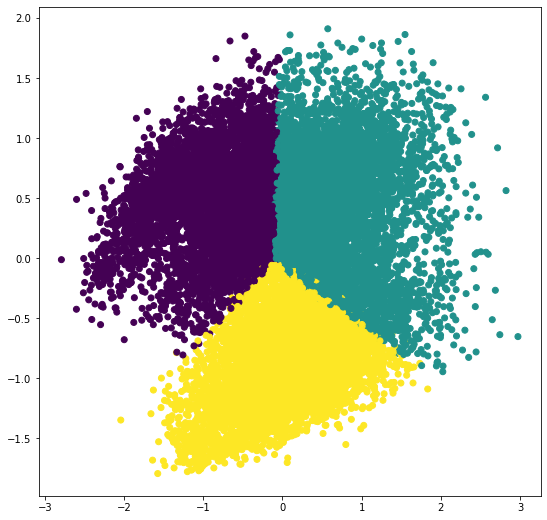

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.scatter(pca_data["PCA1"],pca_data["PCA2"],c=final_labels1)
plt.show()

In [20]:
dl=new_data
dl['Labels']=final_labels1
grouped=dl.groupby(dl.Labels)

In [21]:
grouped.get_group(0).head(10)

,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Labels
44,27,87,76.0,85.0,85.0,85.0,76.0,72.0,76.0,76.0,76.0,72.0,56.0,59.0,59.0,59.0,56.0,53.0,53.0,53.0,52.0,53.0,53.0,53.0,52.0,53.0,53.0,53.0,196.0,6.02,115000.0,51000000.0,90,1660,3.0,3.0,2.0,30.0,19.0,81.0,66.0,14.0,66.0,28.0,28.0,56.0,60.0,68.0,75.0,50.0,80.0,40.0,55.0,81.0,71.0,94.0,15.0,87.0,88.0,24.0,43.0,33.0,78.0,91.0,88.0,86.0,7.0,11.0,7.0,13.0,5.0,0.0
88,27,85,77.0,84.0,84.0,84.0,77.0,73.0,75.0,75.0,75.0,73.0,54.0,57.0,57.0,57.0,54.0,50.0,50.0,50.0,50.0,49.0,49.0,49.0,50.0,50.0,50.0,50.0,183.0,6.02,96000.0,37500000.0,87,1642,3.0,2.0,2.0,27.0,10.0,80.0,60.0,16.0,54.0,30.0,10.0,61.0,65.0,80.0,85.0,68.0,85.0,59.0,40.0,86.0,76.0,82.0,12.0,86.0,86.0,25.0,22.0,26.0,79.0,86.0,87.0,89.0,8.0,6.0,8.0,15.0,12.0,0.0
111,23,84,75.0,84.0,84.0,84.0,75.0,72.0,74.0,74.0,74.0,72.0,54.0,57.0,57.0,57.0,54.0,51.0,51.0,51.0,52.0,52.0,52.0,52.0,52.0,57.0,57.0,57.0,176.0,6.01,63000.0,34000000.0,88,1758,2.0,3.0,2.0,47.0,37.0,81.0,68.0,30.0,47.0,36.0,44.0,58.0,56.0,69.0,70.0,56.0,76.0,43.0,72.0,92.0,67.0,85.0,48.0,89.0,85.0,24.0,27.0,38.0,73.0,88.0,86.0,87.0,9.0,11.0,7.0,10.0,15.0,0.0
115,22,84,74.0,82.0,82.0,82.0,74.0,70.0,76.0,76.0,76.0,70.0,53.0,61.0,61.0,61.0,53.0,53.0,53.0,53.0,50.0,53.0,53.0,53.0,50.0,57.0,57.0,57.0,214.0,6.05,84000.0,36500000.0,90,1648,2.0,3.0,2.0,30.0,20.0,86.0,78.0,31.0,42.0,28.0,30.0,63.0,63.0,52.0,84.0,33.0,79.0,33.0,77.0,38.0,65.0,94.0,62.0,82.0,82.0,26.0,30.0,32.0,72.0,82.0,85.0,83.0,15.0,7.0,14.0,7.0,15.0,0.0
152,37,84,75.0,83.0,83.0,83.0,75.0,72.0,76.0,76.0,76.0,72.0,58.0,64.0,64.0,64.0,58.0,58.0,58.0,58.0,55.0,56.0,56.0,56.0,55.0,53.0,53.0,53.0,192.0,6.02,95000.0,4200000.0,84,1740,3.0,3.0,2.0,40.0,21.0,72.0,65.0,35.0,64.0,50.0,31.0,65.0,65.0,61.0,77.0,52.0,80.0,64.0,54.0,81.0,53.0,83.0,39.0,66.0,90.0,28.0,62.0,60.0,88.0,94.0,90.0,82.0,4.0,2.0,4.0,2.0,4.0,0.0
165,22,83,74.0,82.0,82.0,82.0,74.0,71.0,77.0,77.0,77.0,71.0,58.0,65.0,65.0,65.0,58.0,58.0,58.0,58.0,53.0,54.0,54.0,54.0,53.0,53.0,53.0,53.0,214.0,6.05,67000.0,29500000.0,88,1673,2.0,4.0,2.0,35.0,20.0,80.0,74.0,24.0,55.0,30.0,27.0,69.0,64.0,64.0,77.0,48.0,82.0,44.0,44.0,72.0,63.0,93.0,25.0,76.0,80.0,27.0,61.0,38.0,75.0,80.0,88.0,84.0,11.0,8.0,7.0,9.0,14.0,0.0
175,29,83,74.0,82.0,82.0,82.0,74.0,72.0,77.0,77.0,77.0,72.0,59.0,65.0,65.0,65.0,59.0,58.0,58.0,58.0,56.0,56.0,56.0,56.0,56.0,57.0,57.0,57.0,190.0,6.03,22000.0,20000000.0,83,1788,3.0,3.0,2.0,45.0,39.0,81.0,74.0,44.0,57.0,32.0,30.0,67.0,62.0,60.0,67.0,52.0,77.0,57.0,46.0,90.0,78.0,86.0,41.0,92.0,81.0,34.0,50.0,47.0,75.0,85.0,85.0,79.0,9.0,11.0,14.0,9.0,7.0,0.0
181,27,83,73.0,82.0,82.0,82.0,73.0,69.0,76.0,76.0,76.0,69.0,55.0,62.0,62.0,62.0,55.0,55.0,55.0,55.0,52.0,53.0,53.0,53.0,52.0,54.0,54.0,54.0,174.0,6.02,67000.0,26000000.0,86,1696,2.0,3.0,2.0,35.0,34.0,85.0,72.0,27.0,47.0,34.0,28.0,69.0,68.0,55.0,61.0,61.0,82.0,49.0,43.0,87.0,58.0,77.0,31.0,83.0,84.0,29.0,41.0,37.0,75.0,86.0,83.0,84.0,14.0,13.0,14.0,13.0,12.0,0.0
202,30,83,70.0,82.0,82.0,82.0,70.0,67.0,73.0,73.0,73.0,67.0,49.0,55.0,55.0,55.0,49.0,47.0,47.0,47.0,45.0,48.0,48.0,48.0,45.0,52.0,52.0,52.0,176.0,6.03,86000.0,19000000.0,83,1582,3.0,2.0,2.0,29.0,27.0,85.0,63.0,17.0,51.0,35.0,26.0,59.0,59.0,50.0,52.0,34.0,78.0,51.0,57.0,81.0,67.0,90.0,20.0,86.0,83.0,24.0,23.0,39.0,79.0,82.0,85.0,82.0,10.0,14.0,5.0,8.0,10.0,0.0
245,23,82,74.0,81.0,81.0,81.0,74.0,71.0,75.0,75.0,75.0,71.0,57.0,62.0,62.0,62.0,57.0,57.0,57.0,57.0,55.0,56.0,56.0,56.0,55.0,56.0,56.0,56.0,185.0,6.03,95000.0,24500000.0,86,1705,2.0,3.0,2.0,

In [25]:
print(new_data.columns)

Index(['Age', 'Overall', 'RB', 'RCB', 'CB', 'LCB', 'LB', 'RWB', 'RDM', 'CDM',
       'LDM', 'LWB', 'RM', 'RCM', 'CM', 'LCM', 'LM', 'RAM', 'CAM', 'LAM', 'RW',
       'RF', 'CF', 'LF', 'LW', 'RS', 'ST', 'LS', 'Weight', 'Height', 'Wage',
       'Value', 'Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Labels'],
      dtype='object')


In [22]:
grouped.get_group(1).head(10)

,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Labels
0,31,94,60.0,48.0,48.0,48.0,60.0,65.0,62.0,62.0,62.0,65.0,92.0,85.0,85.0,85.0,92.0,94.0,94.0,94.0,93.0,94.0,94.0,94.0,93.0,89.0,89.0,89.0,159.0,5.07,565000.0,110500000.0,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1.0
1,33,94,62.0,54.0,54.0,54.0,62.0,66.0,62.0,62.0,62.0,66.0,89.0,82.0,82.0,82.0,89.0,89.0,89.0,89.0,90.0,91.0,91.0,91.0,90.0,92.0,92.0,92.0,183.0,6.02,405000.0,77000000.0,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.0
2,26,92,61.0,48.0,48.0,48.0,61.0,66.0,61.0,61.0,61.0,66.0,89.0,82.0,82.0,82.0,89.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,85.0,85.0,85.0,150.0,5.09,290000.0,118500000.0,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1.0
4,27,91,74.0,67.0,67.0,67.0,74.0,78.0,78.0,78.0,78.0,78.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,88.0,88.0,88.0,88.0,88.0,83.0,83.0,83.0,154.0,5.11,355000.0,102000000.0,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.0
5,27,91,61.0,50.0,50.0,50.0,61.0,67.0,64.0,64.0,64.0,67.0,90.0,83.0,83.0,83.0,90.0,90.0,90.0,90.0,90.0,89.0,89.0,89.0,90.0,84.0,84.0,84.0,163.0,5.08,340000.0,93000000.0,91,2142,4.0,4.0,4.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.0
6,32,91,80.0,72.0,72.0,72.0,80.0,83.0,82.0,82.0,82.0,83.0,87.0,89.0,89.0,89.0,87.0,88.0,88.0,88.0,86.0,85.0,85.0,85.0,86.0,78.0,78.0,78.0,146.0,5.08,420000.0,67000000.0,91,2280,4.0,4.0,4.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1.0
7,31,91,68.0,65.0,65.0,65.0,68.0,71.0,70.0,70.0,70.0,71.0,86.0,81.0,81.0,81.0,86.0,87.0,87.0,87.0,88.0,89.0,89.0,89.0,88.0,89.0,89.0,89.0,190.0,6.00,455000.0,80000000.0,91,2346,5.0,4.0,3.0,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,1.0
8,32,91,85.0,88.0,88.0,88.0,85.0,82.0,85.0,85.0,85.0,82.0,73.0,76.0,76.0,76.0,73.0,72.0,72.0,72.0,71.0,72.0,72.0,72.0,71.0,74.0,74.0,74.0,181.0,6.00,380000.0,51000000.0,91,2201,4.0,3.0,3.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1.0
10,29,90,59.0,58.0,58.0,58.0,59.0,62.0,63.0,63.0,63.0,62.0,82.0,78.0,78.0,78.0,82.0,84.0,84.0,84.0,84.0,87.0,87.0,87.0,84.0,88.0,88.0,88.0,176.0,6.00,205000.0,77000000.0,90,2152,4.0,4.0,4.0,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,1.0
11,28,90,78.0,73.0,73.0,73.0,78.0,80.0,83.0,83.0,83.0,80.0,83.0,87.0,87.0,87.0,83.0,85.0,85.0,85.0,82.0,83.0,83.0,83.0,82.0,79.0,79.0,79.0,168.0,6.00,355000.0,76500000.0,90,2190,4.0,5.0,3

In [23]:
grouped.get_group(2).head(10)

,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Labels
159,26,83,52.0,52.0,52.0,52.0,52.0,54.0,52.0,52.0,52.0,54.0,72.0,65.0,65.0,65.0,72.0,74.0,74.0,74.0,75.0,78.0,78.0,78.0,75.0,82.0,82.0,82.0,183.0,6.02,60000.0,28500000.0,83,1921,1.0,3.0,4.0,56.0,85.0,83.0,73.0,82.0,75.0,59.0,67.0,47.0,74.0,79.0,83.0,55.0,84.0,55.0,85.0,84.0,56.0,87.0,82.0,65.0,32.0,83.0,58.0,77.0,79.0,26.0,27.0,24.0,8.0,11.0,20.0,19.0,20.0,2.0
164,22,83,54.0,41.0,41.0,41.0,54.0,59.0,52.0,52.0,52.0,59.0,82.0,72.0,72.0,72.0,82.0,81.0,81.0,81.0,83.0,81.0,81.0,81.0,83.0,77.0,77.0,77.0,157.0,5.10,85000.0,34000000.0,87,1918,2.0,3.0,5.0,81.0,76.0,52.0,77.0,77.0,88.0,84.0,70.0,63.0,83.0,95.0,93.0,87.0,81.0,84.0,77.0,75.0,76.0,61.0,73.0,36.0,23.0,79.0,75.0,70.0,75.0,29.0,17.0,15.0,5.0,3.0,5.0,3.0,5.0,2.0
206,27,83,51.0,46.0,46.0,46.0,51.0,55.0,54.0,54.0,54.0,55.0,77.0,71.0,71.0,71.0,77.0,79.0,79.0,79.0,79.0,80.0,80.0,80.0,79.0,81.0,81.0,81.0,194.0,6.02,55000.0,27500000.0,83,1914,4.0,4.0,4.0,68.0,85.0,67.0,78.0,78.0,81.0,78.0,78.0,66.0,85.0,76.0,82.0,71.0,68.0,50.0,89.0,74.0,66.0,86.0,79.0,70.0,30.0,79.0,74.0,92.0,81.0,10.0,22.0,20.0,2.0,2.0,2.0,4.0,2.0,2.0
265,25,82,53.0,49.0,49.0,49.0,53.0,57.0,53.0,53.0,53.0,57.0,78.0,69.0,69.0,69.0,78.0,79.0,79.0,79.0,80.0,81.0,81.0,81.0,80.0,82.0,82.0,82.0,187.0,6.02,135000.0,28500000.0,85,1886,3.0,4.0,3.0,73.0,80.0,86.0,78.0,80.0,83.0,76.0,44.0,51.0,82.0,76.0,86.0,66.0,79.0,60.0,80.0,84.0,68.0,78.0,72.0,56.0,24.0,85.0,76.0,70.0,76.0,37.0,14.0,20.0,4.0,5.0,4.0,4.0,5.0,2.0
320,30,81,52.0,39.0,39.0,39.0,52.0,58.0,54.0,54.0,54.0,58.0,80.0,74.0,74.0,74.0,80.0,81.0,81.0,81.0,80.0,79.0,79.0,79.0,80.0,73.0,73.0,73.0,139.0,5.07,40000.0,17000000.0,81,1853,1.0,5.0,4.0,73.0,72.0,44.0,79.0,67.0,82.0,56.0,75.0,80.0,82.0,86.0,78.0,89.0,80.0,88.0,67.0,44.0,67.0,48.0,75.0,41.0,31.0,82.0,80.0,74.0,77.0,29.0,13.0,23.0,9.0,7.0,8.0,14.0,10.0,2.0
345,25,81,50.0,45.0,45.0,45.0,50.0,53.0,49.0,49.0,49.0,53.0,74.0,65.0,65.0,65.0,74.0,74.0,74.0,74.0,76.0,78.0,78.0,78.0,76.0,80.0,80.0,80.0,152.0,5.07,14000.0,22500000.0,84,1917,1.0,4.0,3.0,53.0,84.0,77.0,68.0,73.0,75.0,68.0,57.0,55.0,78.0,89.0,92.0,91.0,79.0,90.0,79.0,86.0,72.0,73.0,65.0,66.0,20.0,84.0,58.0,70.0,75.0,20.0,20.0,15.0,12.0,14.0,14.0,12.0,8.0,2.0
346,31,81,51.0,48.0,48.0,48.0,51.0,54.0,53.0,53.0,53.0,54.0,75.0,67.0,67.0,67.0,75.0,75.0,75.0,75.0,76.0,79.0,79.0,79.0,76.0,80.0,80.0,80.0,170.0,5.11,45000.0,16000000.0,81,1884,3.0,2.0,3.0,60.0,84.0,75.0,68.0,78.0,80.0,69.0,58.0,55.0,80.0,73.0,75.0,73.0,80.0,77.0,80.0,74.0,66.0,74.0,60.0,58.0,34.0,90.0,68.0,80.0,78.0,40.0,16.0,14.0,12.0,12.0,8.0,5.0,8.0,2.0
403,35,81,51.0,46.0,46.0,46.0,51.0,54.0,55.0,55.0,55.0,54.0,76.0,73.0,73.0,73.0,76.0,79.0,79.0,79.0,78.0,80.0,80.0,80.0,78.0,80.0,80.0,80.0,174.0,5.11,39000.0,8000000.0,81,1933,2.0,4.0,4.0,66.0,84.0,68.0,76.0,87.0,76.0,78.0,78.0,73.0,81.0,73.0,67.0,71.0,81.0,75.0,87.0,69.0,66.0,76.0,89.0,44.0,26.0,84.0,77.0,84.0,81.0,35.0,21.0,15.0,6.0,7.0,5.0,4.0,4.0,2.0
412,21,80,50.0,49.0,49.0,49.0,50.0,53.0,53.0,53.0,53.0,53.0,72.0,67.0,67.0,67.0,72.0,73.0,73.0,73.0,73.0,76.0,76.0,76.0,73.0,79.0,79.0,79.0,185.0,6.01,25000.0,20500000.0,85,1806,1.0,3.0,3.0,56.0,85.0,81.0,76.0,76.0,76.0,68.0,53.0,58.0,77.0,61.0,65.0,45.0,77.0,53.0,79.0,73.0,71.0,80.0,76.0,65.0,21.0,83.0,60.0,67.0,65.0,35.0,20.0,23.0,7.0,8.0,13.0,12.0,6.0,2.0
440,22,80,54.0,42.0,42.0,42.0,54.0,59.0,55.0,55.0,55.0,59.0,79.0,73.0,73.0,73.0,79.0,79.0,79.0,79.0,80.0,79.0,79.0,79.0,80.0,74.0,74.0,74.0,150.0,5.09,65000.0,20000000.0,85,1878,2.0,3.0,4.0,78.0,7

In [28]:
# cencheck=pd.DataFrame(center1,columns=new_data.columns)
# cencheck['cluster']=cencheck.index
# display_parallel_coordinates_centroids(cencheck,10)
dl['position']=data.Position
dl


,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Labels,position
0,31,94,60.0,48.0,48.0,48.0,60.0,65.0,62.0,62.0,62.0,65.0,92.0,85.0,85.0,85.0,92.0,94.0,94.0,94.0,93.0,94.0,94.0,94.0,93.0,89.0,89.0,89.0,159.0,5.07,565000.0,110500000.0,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1.0,RF
1,33,94,62.0,54.0,54.0,54.0,62.0,66.0,62.0,62.0,62.0,66.0,89.0,82.0,82.0,82.0,89.0,89.0,89.0,89.0,90.0,91.0,91.0,91.0,90.0,92.0,92.0,92.0,183.0,6.02,405000.0,77000000.0,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.0,ST
2,26,92,61.0,48.0,48.0,48.0,61.0,66.0,61.0,61.0,61.0,66.0,89.0,82.0,82.0,82.0,89.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,85.0,85.0,85.0,150.0,5.09,290000.0,118500000.0,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1.0,LW
4,27,91,74.0,67.0,67.0,67.0,74.0,78.0,78.0,78.0,78.0,78.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,88.0,88.0,88.0,88.0,88.0,83.0,83.0,83.0,154.0,5.11,355000.0,102000000.0,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.0,RCM
5,27,91,61.0,50.0,50.0,50.0,61.0,67.0,64.0,64.0,64.0,67.0,90.0,83.0,83.0,83.0,90.0,90.0,90.0,90.0,90.0,89.0,89.0,89.0,90.0,84.0,84.0,84.0,163.0,5.08,340000.0,93000000.0,91,2142,4.0,4.0,4.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.0,LF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,46.0,46.0,46.0,46.0,46.0,45.0,46.0,46.0,46.0,45.0,45.0,46.0,46.0,46.0,45.0,46.0,46.0,46.0,45.0,45.0,45.0,45.0,45.0,43.0,43.0,43.0,134.0,5.09,1000.0,60000.0,65,1307,1.0,2.0,2.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,0.0,CM
18203,19,47,30.0,33.0,33.0,33.0,30.0,31.0,32.0,32.0,32.0,31.0,39.0,36.0,36.0,36.0,39.0,41.0,41.0,41.0,40.0,43.0,43.0,43.0,40.0,46.0,46.0,46.0,170.0,6.03,1000.0,60000.0,63,1098,1.0,2.0,2.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,2.0,ST
18204,16,47,34.0,29.0,29.0,29.0,34.0,35.0,31.0,31.0,31.0,35.0,45.0,39.0,39.0,39.0,45.0,45.0,45.0,45.0,46.0,47.0,47.0,47.0,46.0,46.0,46.0,46.0,148.0,5.08,1000.0,60000.0,67,1189,1.0,3.0,2.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,2.0,ST
18205,17,47,36.0,32.0,32.0,32.0,36.0,37.0,33.0,33.0,33.0,37.0,47.0,40.0,40.0,40.0,47.0,46.0,46.0,46.0,48.0,47.0,47.0,47.0,48.0,48.0,48.0,48.0,154.0,5.10,1000.0,60000.0,66,1228,1.0,3.0,2.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32

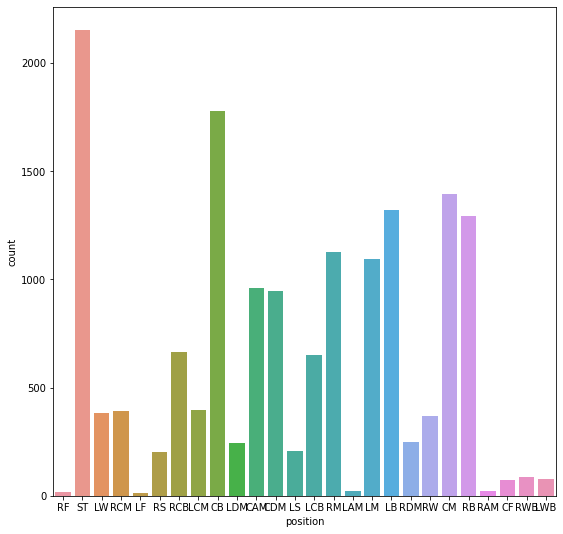

In [33]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(9,9))
sns.countplot(x='position',data=dl,ax=ax)

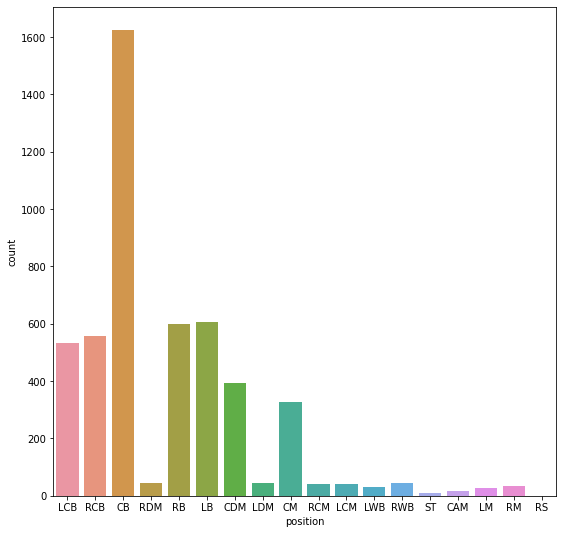

In [34]:
fig, ax = plt.subplots(figsize = (9,9))
sns.countplot(x ='position', data = grouped.get_group(0), ax=ax) 
# grouped.get_group(0)

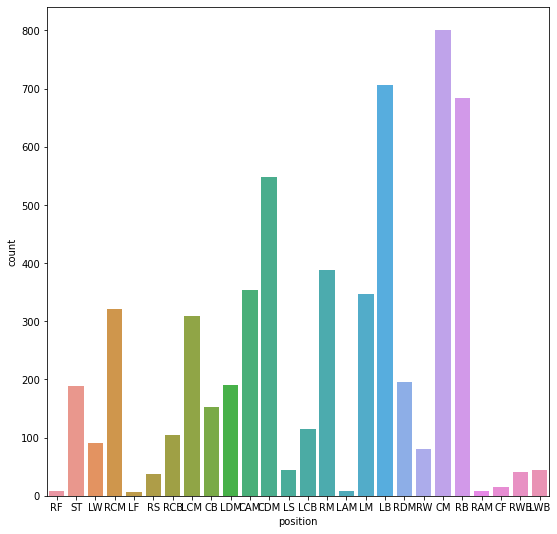

In [35]:
fig, ax = plt.subplots(figsize = (9,9))
sns.countplot(x ='position', data = grouped.get_group(1), ax=ax) 

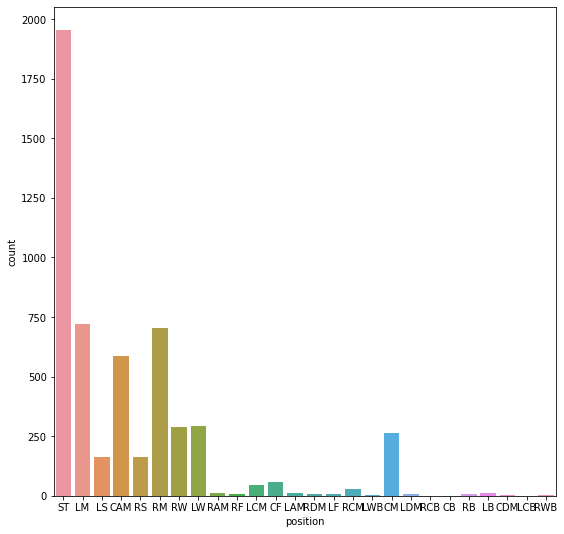

In [36]:
fig, ax = plt.subplots(figsize = (9,9))
sns.countplot(x ='position', data = grouped.get_group(2), ax=ax) 

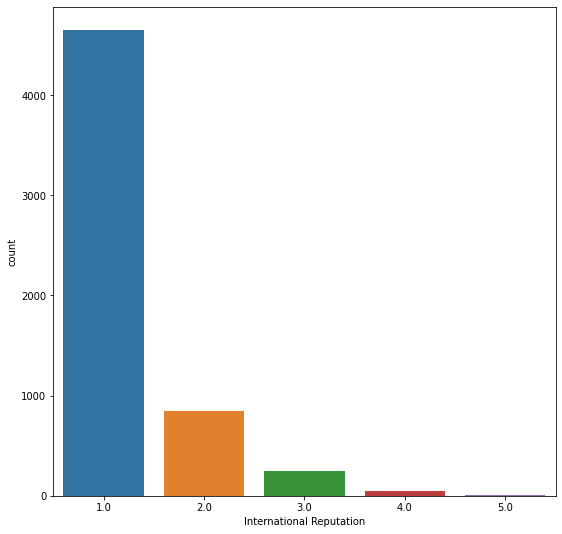

In [47]:
fig, ax = plt.subplots(figsize = (9,9))
sns.countplot(x ='International Reputation', data = grouped.get_group(1), ax=ax) 

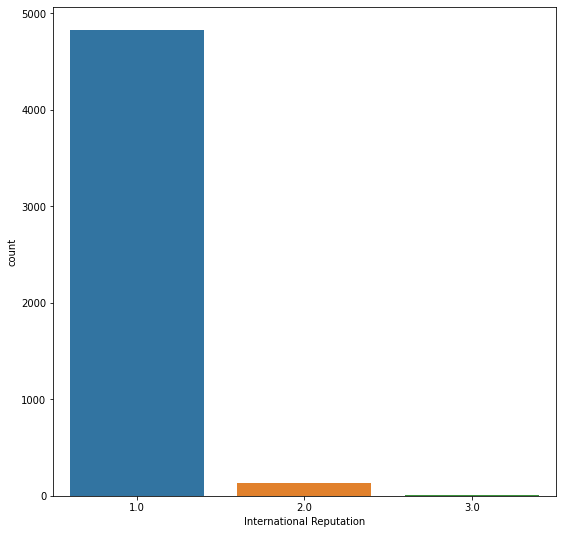

In [50]:
fig, ax = plt.subplots(figsize = (9,9))
sns.countplot(x ='International Reputation', data = grouped.get_group(0), ax=ax) 

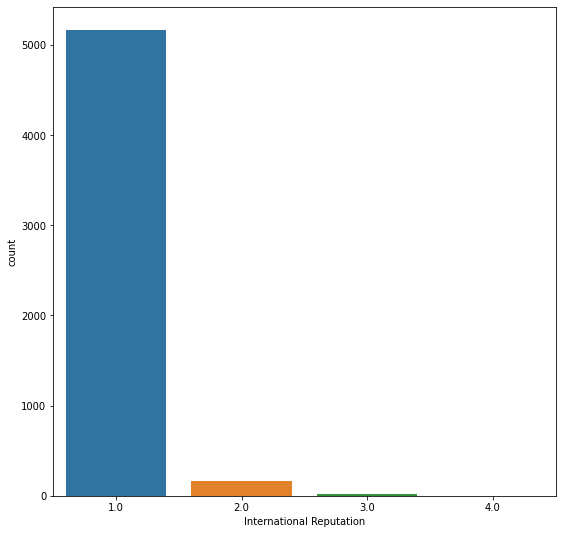

In [51]:
fig, ax = plt.subplots(figsize = (9,9))
sns.countplot(x ='International Reputation', data = grouped.get_group(2), ax=ax) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


0.9172122809141907 [array([0.24520053, 0.30117118, 0.26077419, 0.23508927, 0.23508927,
       0.23508927, 0.26077419, 0.27650097, 0.24788702, 0.24788702,
       0.24788702, 0.27650097, 0.46448341, 0.3672725 , 0.3672725 ,
       0.3672725 , 0.46448341, 0.44940042, 0.44940042, 0.44940042,
       0.48602243, 0.46515455, 0.46515455, 0.46515455, 0.48602243,
       0.44029635, 0.44029635, 0.44029635, 0.380717  , 0.40208156,
       0.00455965, 0.00404959, 0.4516441 , 0.37110427, 0.00083556,
       0.49089238, 0.12555704, 0.42885092, 0.55905159, 0.4648345 ,
       0.48439675, 0.48800969, 0.55385043, 0.43563559, 0.36319471,
       0.35460778, 0.48989794, 0.64375998, 0.62827164, 0.59873819,
       0.44966578, 0.61349635, 0.55625289, 0.49708177, 0.46299795,
       0.47110814, 0.48810483, 0.37987886, 0.18667259, 0.5491907 ,
       0.48811057, 0.54414689, 0.42683643, 0.24407547, 0.20725549,
       0.1983231 , 0.25677733, 0.29159007, 0.23389873, 0.29151696,
       0.25767788]), array([0.44533923, 0.

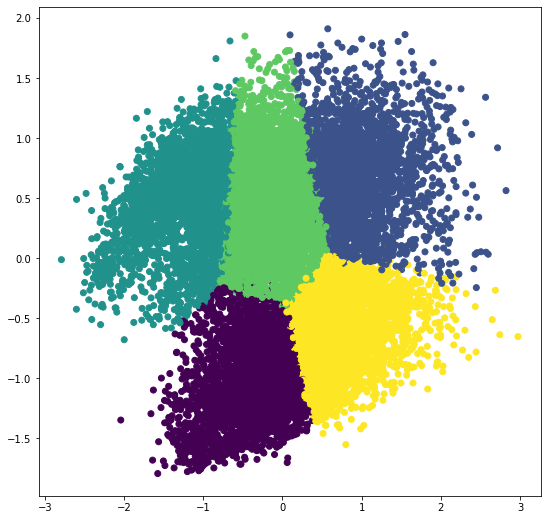

In [ ]:
center=KMeanIntialize(5,listofRow,rows,columns)
final_labels2,quality2,center2=KMean(5,listofRow,center,rows,columns)
print(quality2,center2)
plt.figure(figsize=(9,9))
plt.scatter(pca_data["PCA1"],pca_data["PCA2"],c=final_labels2)
plt.show()

In [ ]:
print(Counter(final_labels2).values())

dict_values([3335, 2712, 4372, 2711, 2992])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


cluster quality: 0.7940447843953037 [array([2.22611219e-01, 2.89621615e-01, 2.79127835e-01, 2.26765770e-01,
       2.26765770e-01, 2.26765770e-01, 2.79127835e-01, 2.98048180e-01,
       2.57433695e-01, 2.57433695e-01, 2.57433695e-01, 2.98048180e-01,
       4.76804279e-01, 3.78393250e-01, 3.78393250e-01, 3.78393250e-01,
       4.76804279e-01, 4.56897310e-01, 4.56897310e-01, 4.56897310e-01,
       4.95200497e-01, 4.62934470e-01, 4.62934470e-01, 4.62934470e-01,
       4.95200497e-01, 4.16779497e-01, 4.16779497e-01, 4.16779497e-01,
       3.23279184e-01, 8.49572480e-02, 4.00112973e-03, 3.64072995e-03,
       4.57066134e-01, 3.75020837e-01, 2.41779497e-04, 4.93834623e-01,
       1.50870406e-01, 4.67076709e-01, 5.33046991e-01, 4.01072399e-01,
       4.99085875e-01, 4.70738636e-01, 5.68583813e-01, 4.53694857e-01,
       3.83945841e-01, 3.92715249e-01, 4.94224535e-01, 6.78583989e-01,
       6.50965756e-01, 6.47810074e-01, 4.39690522e-01, 6.93619635e-01,
       5.34332689e-01, 4.76276740e-01, 4

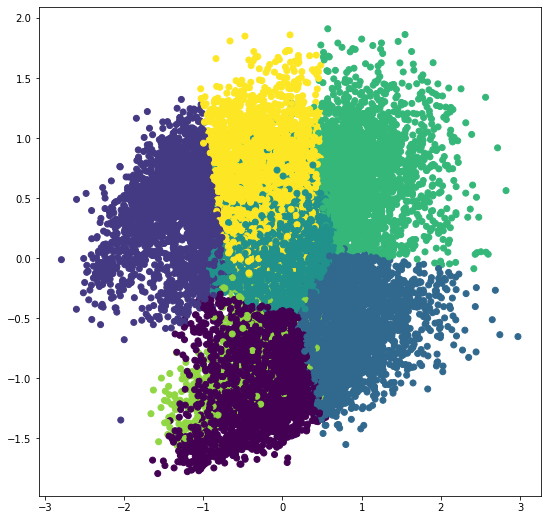

In [ ]:
center=KMeanIntialize(7,listofRow,rows,columns)
final_labels3,quality3,center3=KMean(7,listofRow,center,rows,columns)
print("cluster quality:", quality3,center3)
plt.figure(figsize=(9,9))
plt.scatter(pca_data["PCA1"],pca_data["PCA2"],c=final_labels3)
plt.show()

  

In [ ]:
from collections import Counter
print(Counter(final_labels3).values())

dict_values([2595, 2363, 2392, 1625, 2875, 2204, 2068])


In [ ]:
print(pca_data)
from sklearn.metrics import silhouette_score 
passing=pca_data.to_numpy().tolist()
silhouette_scores=[]
elbow_scores=[] # calculating the silhouette score and within cluster sum of sqaure for finding best cluster
rows=len(pca_data)
for i in range(1,9):

  arr=KMeanIntialize(i,passing,rows,2)
  labels,score,centers=KMean(i,passing,arr,rows,2)
  if i>1:
     silhouette_scores.append(silhouette_score(pca_data,labels))
  elbow_scores.append(score)


           PCA1      PCA2
0      2.973465 -0.652305
1      2.688134 -0.266845
2      2.744953 -0.636455
3      2.823138  0.562468
4      2.649139 -0.511731
...         ...       ...
16117 -1.354830 -0.630343
16118 -2.040086 -1.346811
16119 -1.502292 -1.687143
16120 -1.374795 -1.531374
16121 -1.321963 -0.503331

[16122 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

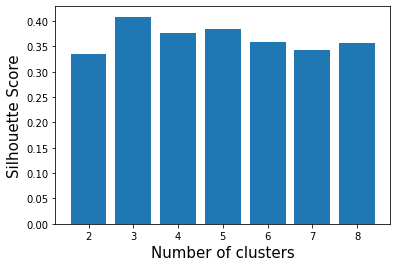

[0.33491329870272474, 0.40846488347364207, 0.37577992580520425, 0.383807867071717, 0.35821971843201433, 0.3424626585683745, 0.35671604476976726]


In [ ]:
plt.bar([2,3,4,5,6,7,8], silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 15) 
plt.ylabel('Silhouette Score', fontsize = 15) 
plt.show()
print(silhouette_scores)

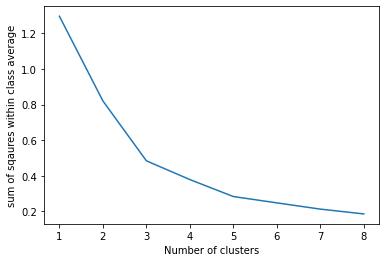

In [ ]:
plt.plot([1,2,3,4,5,6,7,8], elbow_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('sum of sqaures within class average', fontsize = 10)
plt.show() 

In [ ]:
print(elbow_scores)

[1.2969300238067285, 0.8207511340148658, 0.48399259671933514, 0.37853688602256097, 0.2831291085796877, 0.24754304332685337, 0.21242399250367885, 0.18539637941840686]


In [ ]:
# verifying the answer by using predefine k-mean clustering fucntion from python library 
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=7).fit(normalize_data)
cen=Kmeans.cluster_centers_
print(cen)


[[3.10169027e-01 3.27051926e-01 4.83608123e-01 5.67677095e-01
  5.67677095e-01 5.67677095e-01 4.83608123e-01 4.29527804e-01
  4.56767660e-01 4.56767660e-01 4.56767660e-01 4.29527804e-01
  2.65710656e-01 2.70427372e-01 2.70427372e-01 2.70427372e-01
  2.65710656e-01 2.30069078e-01 2.30069078e-01 2.30069078e-01
  2.52258579e-01 2.23528109e-01 2.23528109e-01 2.23528109e-01
  2.52258579e-01 2.02444038e-01 2.02444038e-01 2.02444038e-01
  4.69792572e-01 7.67896406e-01 5.32024564e-03 4.72681783e-03
  4.42463770e-01 2.98186190e-01 3.08359982e-03 4.24052079e-01
  7.61382671e-04 3.07368327e-01 1.88638379e-01 5.66567012e-01
  4.20139302e-01 2.28877341e-01 3.07660977e-01 2.41618828e-01
  2.39514673e-01 3.35467263e-01 3.17078349e-01 4.78490445e-01
  4.62202176e-01 3.88336452e-01 4.62110553e-01 4.48211574e-01
  3.49970955e-01 5.83780504e-01 4.94600804e-01 6.46540785e-01
  2.04180816e-01 5.90073427e-01 5.98196080e-01 2.44898736e-01
  2.93774861e-01 3.22173367e-01 3.99176472e-01 5.95325110e-01
  6.3953

In [ ]:
arr=np.zeros(rows)
count=0
check=[[],[],[],[],[],[],[]]
for i in range(rows):
  dis=np.zeros(len(cen))
  
  for j in range(len(cen)):
    sum=0.0
    for k in range(columns):
      sum+=(listofRow[i][k]-cen[j][k])**2
    dis[j]+=sum
  check[np.argmin(dis,axis=0)].append(listofRow[i])
  arr[i]+=np.argmin(dis,axis=0)


dict_values([2468, 2439, 2395, 1583, 2923, 2189, 2125])


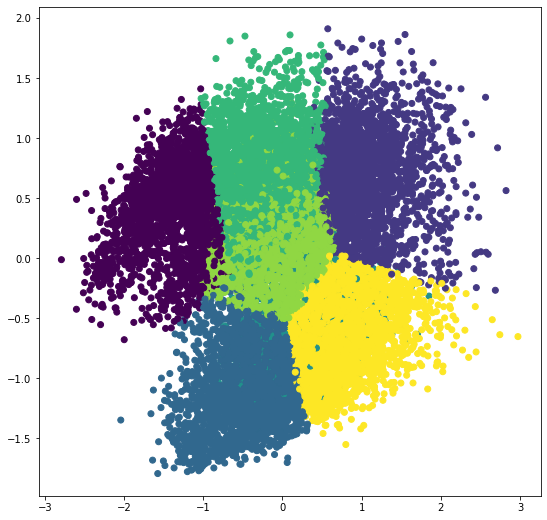

In [ ]:
print(Counter(arr).values())
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.scatter(pca_data["PCA1"],pca_data["PCA2"],c=arr)
plt.show()

age,
overall,
potentail,
value,
wage,
special,
International Reputation,
weak foot,
skill moves,

1.   List item
2.   List item

